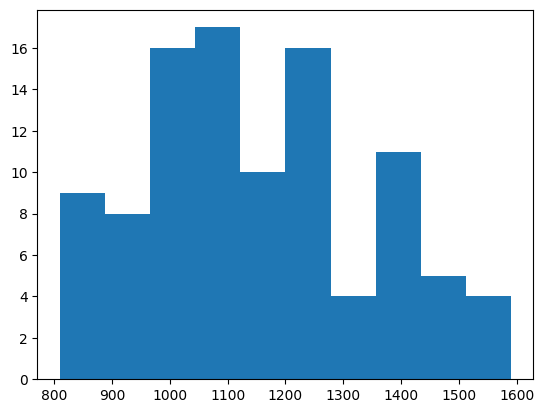

[(0, 860), (1, 1240), (2, 1230), (3, 1100), (4, 1250), (5, 860), (6, 1220), (7, 1370), (8, 1060), (9, 870), (10, 960), (11, 1400), (12, 1290), (13, 1370), (14, 1180), (15, 980), (16, 1510), (17, 1170), (18, 980), (19, 980), (20, 990), (21, 1590), (22, 1120), (23, 980), (24, 1010), (25, 1030), (26, 1370), (27, 1220), (28, 1250), (29, 1120), (30, 1000), (31, 1590), (32, 1270), (33, 930), (34, 1030), (35, 990), (36, 1260), (37, 1230), (38, 1120), (39, 940), (40, 810), (41, 1360), (42, 1200), (43, 1190), (44, 940), (45, 1050), (46, 1130), (47, 1340), (48, 1260), (49, 910), (50, 850), (51, 1380), (52, 1270), (53, 1180), (54, 1200), (55, 1010), (56, 1450), (57, 1410), (58, 1080), (59, 1100), (60, 1020), (61, 1570), (62, 1430), (63, 900), (64, 910), (65, 880), (66, 1420), (67, 1180), (68, 1180), (69, 1090), (70, 1010), (71, 1490), (72, 1490), (73, 1300), (74, 1200), (75, 970), (76, 1360), (77, 1260), (78, 1110), (79, 1110), (80, 830), (81, 1580), (82, 1140), (83, 1070), (84, 990), (85, 1080),

In [25]:
import os
import joblib
import optuna
import statistics
import time
import matplotlib.pyplot as plt

n_parallel = 8
n_files = 100

def objective(trial: optuna.trial.Trial):
    temp_start = trial.suggest_float("temp_start", 0, 1e5)
    temp_end = trial.suggest_float("temp_end", 0, 1e5)
    scores = calc_scores(temp_start, temp_end)
    return statistics.mean(scores)

def calc_scores(temp_start: float, temp_end: float):
    scores = joblib.Parallel(n_jobs = n_parallel)(
        joblib.delayed(calc_score_each)(i, temp_start, temp_end) for i in range(n_files)
    )
    return scores

def calc_score_each(seed: int, temp_start: float, temp_end: float):
    in_file = f"in/testcase_{seed:03}.txt"
    os.makedirs("tools/out", exist_ok=True)
    out_file = f"out/{seed:03}.txt"
    os.system(f"./exe {temp_start} {temp_end} < tools/{in_file} 1> tools/{out_file} 2> /dev/null")
    cmd = f"cd tools && ./judge_exe {in_file} < {out_file} 2> /dev/null"
    out = os.popen(cmd)
    #return int(out.read().split()[-1])
    return (seed, int(out.read().split()[-1]))

os.system("g++ -O2 -std=c++17 main.cpp -o exe")
scores = calc_scores(0, 0)
values = [val for seed, val in scores]
plt.hist(values)
plt.show()
print(scores)
print(sum(values))


83568


In [20]:
import os
import joblib
import optuna
import statistics
import time
import matplotlib.pyplot as plt

n_parallel = 8
n_files = 100

def objective(trial: optuna.trial.Trial):
    temp_start = trial.suggest_float("p_erase", 0, 1)
    temp_end = trial.suggest_float("p_random_add", 0, 1)
    scores = calc_scores(temp_start, temp_end)
    return statistics.mean(scores)

def calc_scores(temp_start: float, temp_end: float):
    scores = joblib.Parallel(n_jobs = n_parallel)(
        joblib.delayed(calc_score_each)(i, temp_start, temp_end) for i in range(n_files)
    )
    return scores

def calc_score_each(seed: int, temp_start: float, temp_end: float):
    in_file = f"in/testcase_{seed:03}.txt"
    os.makedirs("tools/out", exist_ok=True)
    out_file = f"out/{seed:03}.txt"
    os.system(f"./exe {temp_start} {temp_end} < tools/{in_file} 1> tools/{out_file} 2> /dev/null")
    cmd = f"cd tools && ./judge_exe {in_file} < {out_file} 2> /dev/null"
    out = os.popen(cmd)
    return int(out.read().split()[-1])
    #return (seed, int(out.read().split()[-1]))

os.system("g++ -O2 -std=c++17 main.cpp -o exe -DOPTUNA")

start_time = time.time()
study = optuna.create_study(
    direction="maximize",
    storage="sqlite:///optuna.db",
    study_name="tune_range3",
    load_if_exists=True,
)
study.optimize(objective, n_trials=100)
end_time = time.time()
print(f"100 trials over {n_files} cases takes {end_time - start_time} seconds.")

study = optuna.load_study(storage="sqlite:///ahc000.db", study_name="tune_range")
optuna.visualization.plot_optimization_history(study)

[I 2023-04-16 16:00:57,660] A new study created in RDB with name: tune_range3
[I 2023-04-16 16:01:35,461] Trial 0 finished with value: 1229.9 and parameters: {'p_erase': 0.7576320798707264, 'p_random_add': 0.8794149765932574}. Best is trial 0 with value: 1229.9.
[I 2023-04-16 16:02:12,413] Trial 1 finished with value: 1184.6 and parameters: {'p_erase': 0.4743621798632077, 'p_random_add': 0.394290911189352}. Best is trial 0 with value: 1229.9.
[I 2023-04-16 16:02:49,395] Trial 2 finished with value: 1194.5 and parameters: {'p_erase': 0.5124299786314663, 'p_random_add': 0.356023006569416}. Best is trial 0 with value: 1229.9.
[I 2023-04-16 16:03:26,360] Trial 3 finished with value: 1206.2 and parameters: {'p_erase': 0.509538466951104, 'p_random_add': 0.6262187868873657}. Best is trial 0 with value: 1229.9.
[I 2023-04-16 16:04:03,356] Trial 4 finished with value: 1216.3 and parameters: {'p_erase': 0.7689427053602453, 'p_random_add': 0.7261858502291305}. Best is trial 0 with value: 1229.9.


KeyboardInterrupt: 

In [1]:
for n in range(60):
    v = n + 1
    if(v%2 != 0 and v%3 != 0 and v%4 != 0 and v%5 != 0):
        print(v)

1
7
11
13
17
19
23
29
31
37
41
43
47
49
53
59
